In [1]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
GLyearQCL = pd.read_csv('../queries_results/USA inner/USA year inner quadcl count.csv', header = 0)
quadcodes = pd.DataFrame({'QuadClass': [1, 2, 3, 4], 'QuadDescription': ['Verbal Cooperation', 'Material Cooperation', 'Verbal Conflict','Material Conflict']})
GLyearQCL = GLyearQCL.merge(quadcodes.set_index('QuadClass'), on='QuadClass', how='left')

/home/micha/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


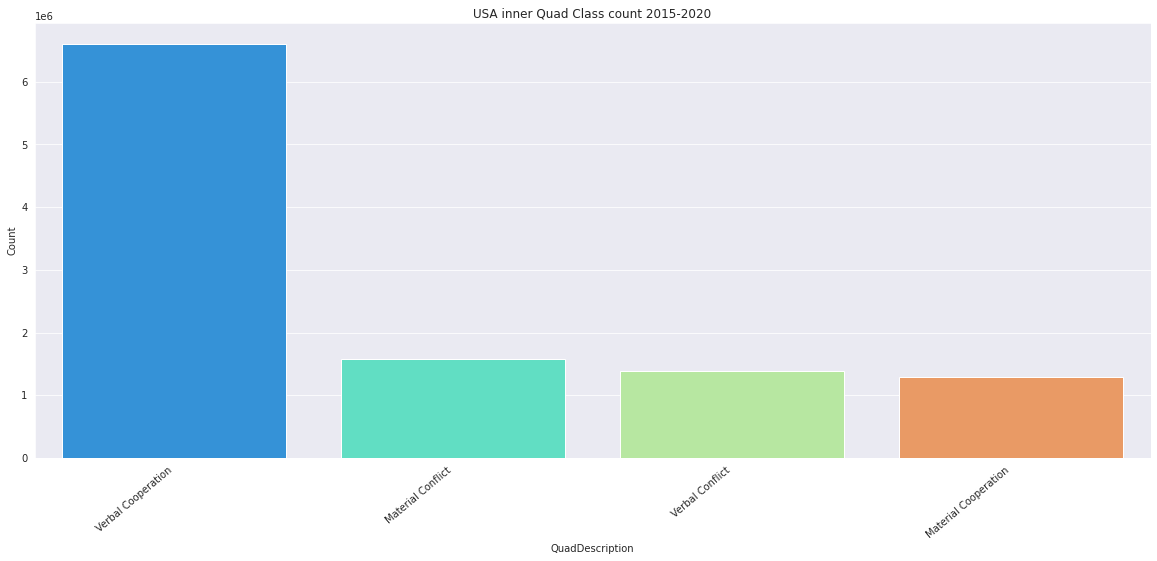

In [2]:
s = GLyearQCL.groupby("QuadDescription", as_index=False).sum().sort_values(by="Count", ascending=False)
g = sns.barplot(s.QuadDescription, s.Count, palette='rainbow')
g.set_title("USA inner Quad Class count 2015-2020")
g.set(ylabel='Count')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
g.figure.set_size_inches(20,8)
plt.savefig('../../src/fig/USA inner/QC.png', bbox_inches='tight')

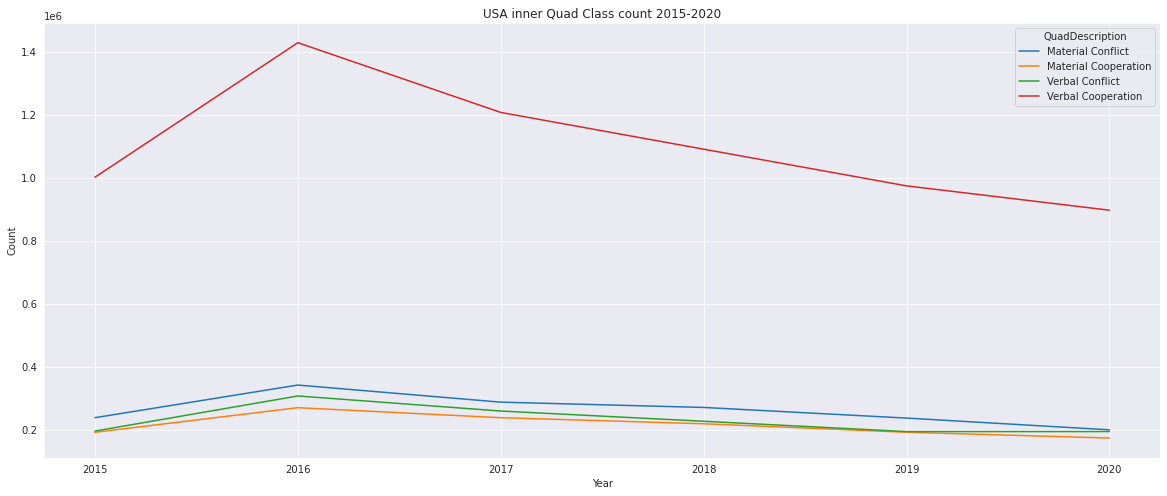

In [3]:
s = GLyearQCL.groupby(["QuadDescription", "Year"], as_index=False).sum().sort_values(by="Count", ascending=False)
s = s.groupby(["Year","QuadDescription"]).agg({'Count':'sum'})
g = s.unstack().plot(y='Count')
g.set(ylabel='Count')
g.set_title("USA inner Quad Class count 2015-2020")
g.figure.set_size_inches(20,8)
plt.savefig('../../src/fig/USA inner/QCtime.png', bbox_inches='tight')

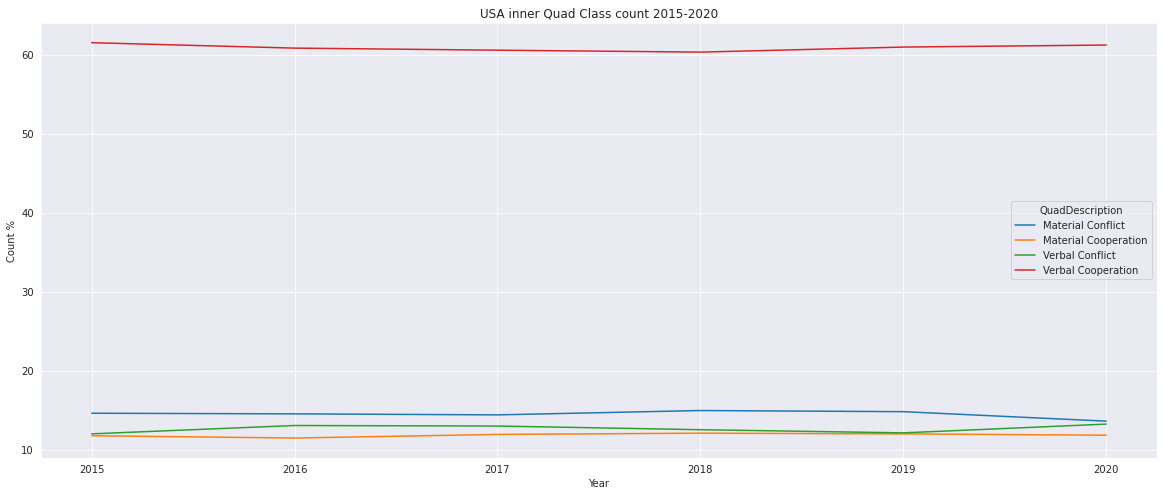

In [4]:
s = GLyearQCL.groupby(["QuadDescription", "Year"], as_index=False).sum().sort_values(by="Count", ascending=False)
s = s.groupby(["Year","QuadDescription"]).agg({'Count':'sum'})

s['%']= s.groupby(level=0).apply(lambda x:  100*x / x.sum())

g = s.unstack().plot(y='%')
g.set(ylabel='Count %')
g.set_title("USA inner Quad Class count 2015-2020")
g.figure.set_size_inches(20,8)
plt.savefig('../../src/fig/USA inner/QCperc.png', bbox_inches='tight')